In [72]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\alisa\OneDrive\Desktop\Panic Attack\panic_attack_dataset.csv",usecols=['Panic_Attack_Frequency', 'Duration_Minutes',
       'Trigger', 'Heart_Rate', 'Sweating', 'Shortness_of_Breath', 'Dizziness',
       'Chest_Pain', 'Trembling', 'Medical_History', 'Medication',
       'Caffeine_Intake', 'Exercise_Frequency', 'Sleep_Hours',
       'Alcohol_Consumption', 'Smoking', 'Therapy', 'Panic_Score'])

In [3]:
df.columns

Index(['Panic_Attack_Frequency', 'Duration_Minutes', 'Trigger', 'Heart_Rate',
       'Sweating', 'Shortness_of_Breath', 'Dizziness', 'Chest_Pain',
       'Trembling', 'Medical_History', 'Medication', 'Caffeine_Intake',
       'Exercise_Frequency', 'Sleep_Hours', 'Alcohol_Consumption', 'Smoking',
       'Therapy', 'Panic_Score'],
      dtype='object')

<Axes: ylabel='Heart_Rate'>

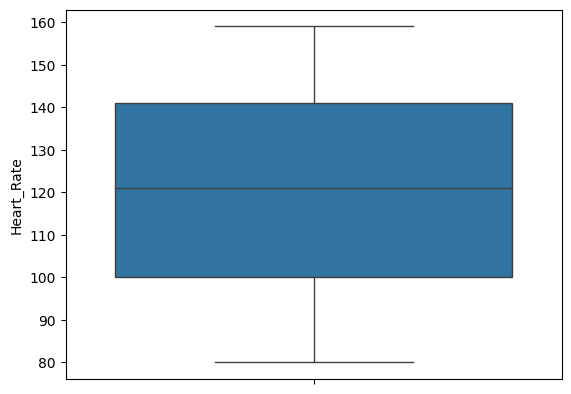

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(data=df['Heart_Rate'])

In [5]:
df.isnull().sum()

Panic_Attack_Frequency      0
Duration_Minutes            0
Trigger                     0
Heart_Rate                  0
Sweating                    0
Shortness_of_Breath         0
Dizziness                   0
Chest_Pain                  0
Trembling                   0
Medical_History           122
Medication                  0
Caffeine_Intake             0
Exercise_Frequency          0
Sleep_Hours                 0
Alcohol_Consumption         0
Smoking                     0
Therapy                     0
Panic_Score                 0
dtype: int64

Imputation part

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer 
transformer = ColumnTransformer(transformers=[
    ("MODE on Medical History",SimpleImputer(strategy="most_frequent"),['Medical_History'])
],remainder='passthrough')

In [7]:
transorm_data = transformer.fit_transform(df)

In [8]:
colmns = ['Medical_History'] +[col for col in df.columns if col != 'Medical_History']

In [9]:
df = pd.DataFrame(transorm_data,columns=colmns)

In [10]:
print(df.isnull().sum())

Medical_History           0
Panic_Attack_Frequency    0
Duration_Minutes          0
Trigger                   0
Heart_Rate                0
Sweating                  0
Shortness_of_Breath       0
Dizziness                 0
Chest_Pain                0
Trembling                 0
Medication                0
Caffeine_Intake           0
Exercise_Frequency        0
Sleep_Hours               0
Alcohol_Consumption       0
Smoking                   0
Therapy                   0
Panic_Score               0
dtype: int64


In [11]:
df.shape

(1200, 18)

# Encoding part

In [12]:
df.columns

Index(['Medical_History', 'Panic_Attack_Frequency', 'Duration_Minutes',
       'Trigger', 'Heart_Rate', 'Sweating', 'Shortness_of_Breath', 'Dizziness',
       'Chest_Pain', 'Trembling', 'Medication', 'Caffeine_Intake',
       'Exercise_Frequency', 'Sleep_Hours', 'Alcohol_Consumption', 'Smoking',
       'Therapy', 'Panic_Score'],
      dtype='object')

In [13]:
from sklearn.preprocessing import OrdinalEncoder , OneHotEncoder
transformer = ColumnTransformer(transformers=[
    ("Ordinal Transformer(Y/N)",OrdinalEncoder(),['Sweating', 'Shortness_of_Breath', 'Dizziness','Chest_Pain', 'Trembling','Medication','Smoking','Therapy'])
],remainder='passthrough')

In [14]:
transorm_data = transformer.fit_transform(df) # apply cols. transormer

In [15]:
# converting to Dataframe

convert_df = ['Sweating', 'Shortness_of_Breath', 'Dizziness','Chest_Pain', 'Trembling','Medication','Smoking','Therapy']+['Medical_History','Panic_Attack_Frequency', 'Duration_Minutes','Trigger', 'Heart_Rate','Caffeine_Intake','Exercise_Frequency', 'Sleep_Hours', 'Alcohol_Consumption','Panic_Score']

In [16]:
df = pd.DataFrame(transorm_data,columns=convert_df)

In [17]:
df.head(2)

,Sweating,Shortness_of_Breath,Dizziness,Chest_Pain,Trembling,Medication,Smoking,Therapy,Medical_History,Panic_Attack_Frequency,Duration_Minutes,Trigger,Heart_Rate,Caffeine_Intake,Exercise_Frequency,Sleep_Hours,Alcohol_Consumption,Panic_Score
0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,Anxiety,9,5,Caffeine,134,2,3,6.4,5,5
1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,PTSD,8,9,Stress,139,2,5,5.0,3,7


In [18]:
transformer = ColumnTransformer(transformers=[
    ("One hot encoding",OneHotEncoder(),['Medical_History','Trigger'])
],remainder='passthrough')

In [19]:
transorm_data=transformer.fit_transform(df)

In [20]:
df.columns

Index(['Sweating', 'Shortness_of_Breath', 'Dizziness', 'Chest_Pain',
       'Trembling', 'Medication', 'Smoking', 'Therapy', 'Medical_History',
       'Panic_Attack_Frequency', 'Duration_Minutes', 'Trigger', 'Heart_Rate',
       'Caffeine_Intake', 'Exercise_Frequency', 'Sleep_Hours',
       'Alcohol_Consumption', 'Panic_Score'],
      dtype='object')

In [21]:
# Retrieve feature names for the one-hot encoded columns
ohe_feature_names = transformer.named_transformers_['One hot encoding'].get_feature_names_out(['Medical_History', 'Trigger'])

In [22]:
ohe_feature_names

array(['Medical_History_Anxiety', 'Medical_History_Depression',
       'Medical_History_PTSD', 'Trigger_Caffeine', 'Trigger_PTSD',
       'Trigger_Phobia', 'Trigger_Social Anxiety', 'Trigger_Stress',
       'Trigger_Unknown'], dtype=object)

In [23]:
# remaining cols
remaning_cols = ['Sweating', 'Shortness_of_Breath', 'Dizziness', 'Chest_Pain','Trembling', 'Medication', 'Smoking', 'Therapy','Panic_Attack_Frequency', 'Duration_Minutes', 'Heart_Rate','Caffeine_Intake', 'Exercise_Frequency', 'Sleep_Hours','Alcohol_Consumption', 'Panic_Score']

In [24]:
all_column_names = list(ohe_feature_names) + remaning_cols

# Convert to DataFrame
df = pd.DataFrame(transorm_data, columns=all_column_names)

In [25]:
df.head(2)

,Medical_History_Anxiety,Medical_History_Depression,Medical_History_PTSD,Trigger_Caffeine,Trigger_PTSD,Trigger_Phobia,Trigger_Social Anxiety,Trigger_Stress,Trigger_Unknown,Sweating,...,Smoking,Therapy,Panic_Attack_Frequency,Duration_Minutes,Heart_Rate,Caffeine_Intake,Exercise_Frequency,Sleep_Hours,Alcohol_Consumption,Panic_Score
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,9,5,134,2,3,6.4,5,5
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,8,9,139,2,5,5.0,3,7


In [26]:
df.shape

(1200, 25)

In [27]:
df = df.sample(1200)

In [28]:
df.head(2)

,Medical_History_Anxiety,Medical_History_Depression,Medical_History_PTSD,Trigger_Caffeine,Trigger_PTSD,Trigger_Phobia,Trigger_Social Anxiety,Trigger_Stress,Trigger_Unknown,Sweating,...,Smoking,Therapy,Panic_Attack_Frequency,Duration_Minutes,Heart_Rate,Caffeine_Intake,Exercise_Frequency,Sleep_Hours,Alcohol_Consumption,Panic_Score
224,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,8,18,128,3,1,5.5,7,3
207,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0,41,135,1,1,4.3,9,4


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = df.drop(columns=['Panic_Score'])
y=df['Panic_Score']

In [31]:
X_train , x_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [33]:
lr = LinearRegression()

In [34]:
lr.fit(X_train,y_train)

LinearRegression()

In [35]:
y_pred = lr.predict(x_test)

In [36]:
print(X_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_pred.shape)

(840, 24)
(360, 24)
(840,)
(360,)
(360,)


In [37]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score

In [39]:
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test,y_pred))
print(root_mean_squared_error(y_test,y_pred))

2.4662913424301034
8.110724320868574
2.8479333420690476


# Visualization of Original vs Predicted Data

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [41]:
# Creating a DataFrame for comparision
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


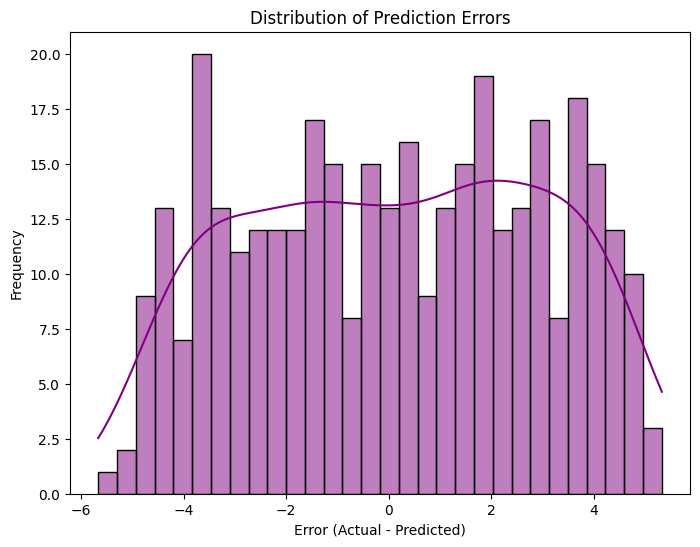

In [43]:
errors = comparison_df['Actual'] - comparison_df['Predicted']
plt.figure(figsize=(8, 6))
sns.histplot(errors, kde=True, bins=30, color='purple')
plt.title('Distribution of Prediction Errors')
plt.xlabel('Error (Actual - Predicted)')
plt.ylabel('Frequency')
plt.show()


In [86]:
df.columns

Index(['Medical_History_Anxiety', 'Medical_History_Depression',
       'Medical_History_PTSD', 'Trigger_Caffeine', 'Trigger_PTSD',
       'Trigger_Phobia', 'Trigger_Social Anxiety', 'Trigger_Stress',
       'Trigger_Unknown', 'Sweating', 'Shortness_of_Breath', 'Dizziness',
       'Chest_Pain', 'Trembling', 'Medication', 'Smoking', 'Therapy',
       'Panic_Attack_Frequency', 'Duration_Minutes', 'Heart_Rate',
       'Caffeine_Intake', 'Exercise_Frequency', 'Sleep_Hours',
       'Alcohol_Consumption', 'Panic_Score'],
      dtype='object')

In [112]:
def viz(data):
    for i in df.columns:
        plt.plot(i)

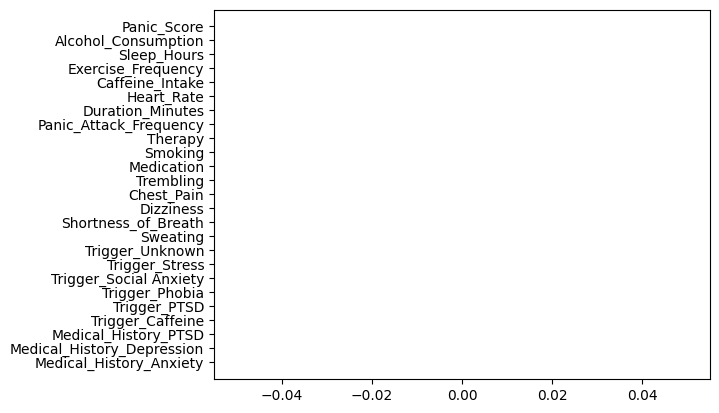

In [113]:
viz(df)